# Import required libraries 

1.   Élément de liste
2.   Élément de liste



In [301]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import itertools
from numpy import mean,std 
import missingno as msno 
import seaborn as sns 
import plotly.express as px 
# preprocessing 
from sklearn.preprocessing import LabelEncoder, RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
## building model to dectect extreme values or well values out of normal range 
### dectect extreme 
from sklearn.cluster import KMeans
import keras 
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.metrics as sm
from sklearn.metrics import mean_absolute_error
import math
# train and test split 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# normalization 
from sklearn.preprocessing import RobustScaler, StandardScaler

# model 
import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# evaluate model 
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error 
from sklearn.model_selection import cross_val_score

In [202]:
AB = pd.read_csv("AB_NYC_2019_1.csv")
AB.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [203]:
AB.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [204]:
categorical = ['Bronx','Queens','Staten Island','Brooklyn','Manhattan']

In [205]:
encod = OrdinalEncoder(categories= [categorical])

In [206]:
encod.fit(AB[['neighbourhood_group']])

OrdinalEncoder(categories=[['Bronx', 'Queens', 'Staten Island', 'Brooklyn',
                            'Manhattan']],
               dtype=<class 'numpy.float64'>)

In [207]:
AB['neighbourhood_group'] = pd.DataFrame(encod.transform(AB[['neighbourhood_group']]))

In [208]:
AB['neighbourhood_group'].iloc[:30605]

0        3.0
1        4.0
2        4.0
3        3.0
4        4.0
5        4.0
6        3.0
7        4.0
8        4.0
9        4.0
10       4.0
11       4.0
12       3.0
13       4.0
14       4.0
15       3.0
16       3.0
17       4.0
18       3.0
19       4.0
20       3.0
21       3.0
22       3.0
23       3.0
24       3.0
25       3.0
26       4.0
27       4.0
28       4.0
29       4.0
30       4.0
31       4.0
32       3.0
33       4.0
34       3.0
35       3.0
36       3.0
37       3.0
38       3.0
39       4.0
40       4.0
41       3.0
42       3.0
43       4.0
44       4.0
45       3.0
46       1.0
47       3.0
48       3.0
49       3.0
50       3.0
51       4.0
52       3.0
53       3.0
54       4.0
55       3.0
56       4.0
57       4.0
58       3.0
59       4.0
60       3.0
61       4.0
62       4.0
63       3.0
64       3.0
65       4.0
66       3.0
67       4.0
68       3.0
69       4.0
70       4.0
71       4.0
72       4.0
73       4.0
74       3.0
75       4.0
76       4.0

# Data Understanding 

In [209]:
AB.neighbourhood_group.head()

0    3.0
1    4.0
2    4.0
3    3.0
4    4.0
Name: neighbourhood_group, dtype: float64

In [210]:
def count_missing_values() :  
      null = AB.isnull().sum() 
      info  = AB.info()
      return null ,info
print(count_missing_values() )
print("The data has 7 categorical  features and the remaing are numerical values")
print(" From the table below, we can see that there are missing values in features Host_id, neighbourhood_group,reviews_per_month,last_review. We should consider on them")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  float64
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(<matplotlib.axes._subplots.AxesSubplot object at 0x7f898f5f22b0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f898f6a5080>)
Visualizing missing values with bar char


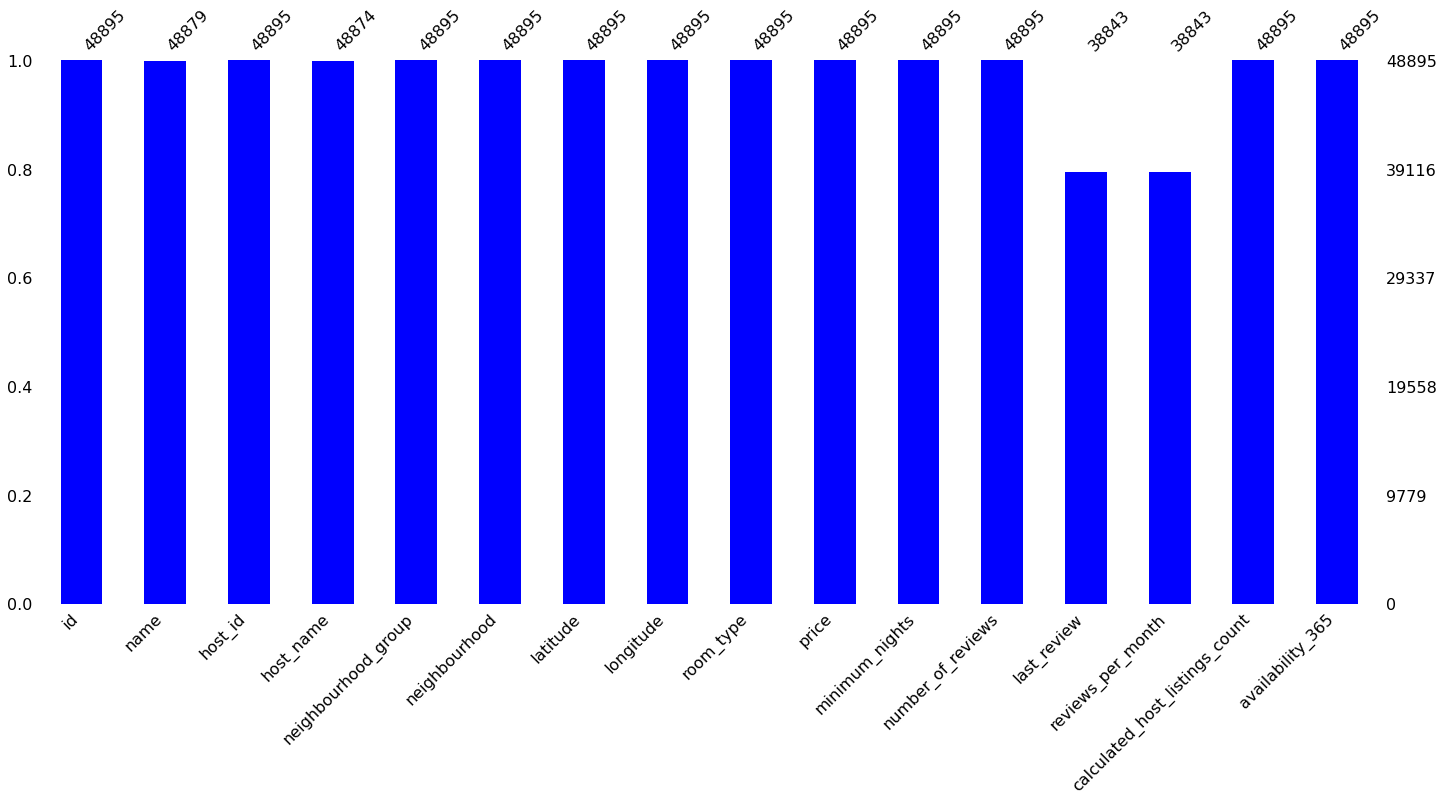

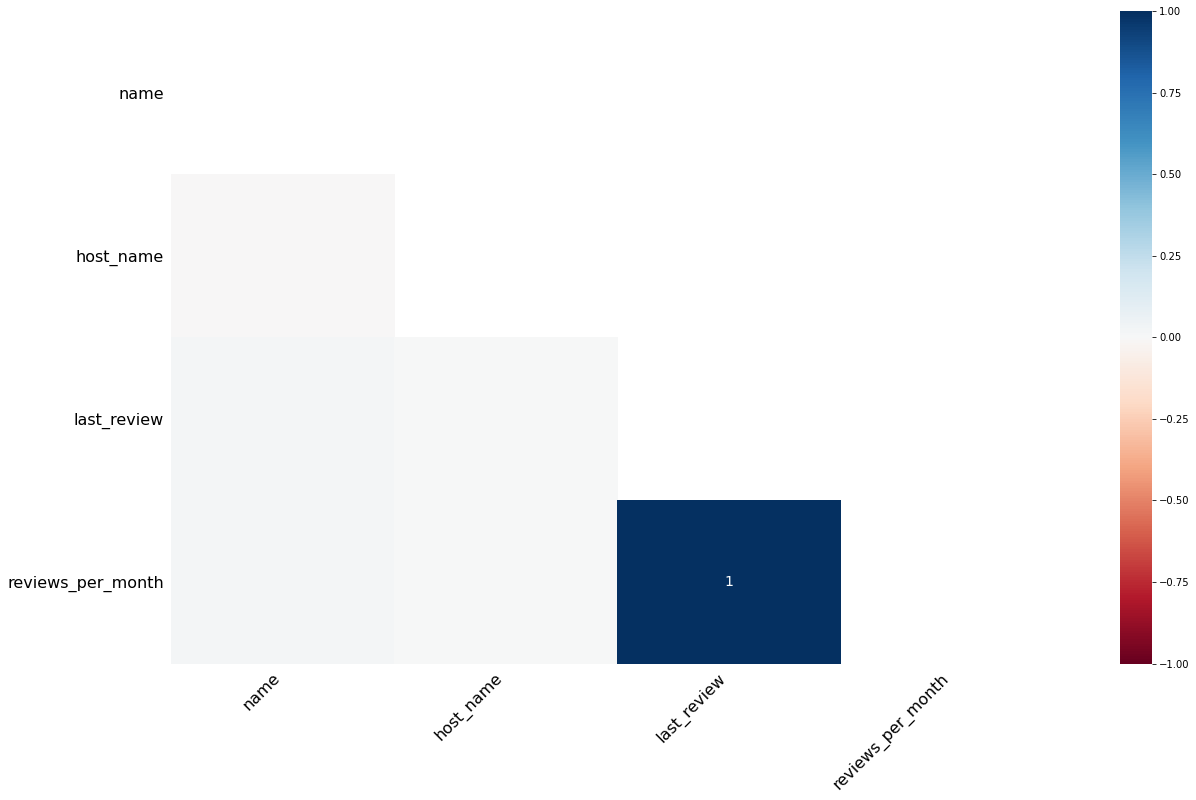

In [211]:
def visualize_mssing_values() : 
  visualize = msno.bar(AB,color = 'blue') 
  heat = msno.heatmap(AB)
  return visualize , heat

print(visualize_mssing_values())
print("Visualizing missing values with bar char")

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898f594fd0>


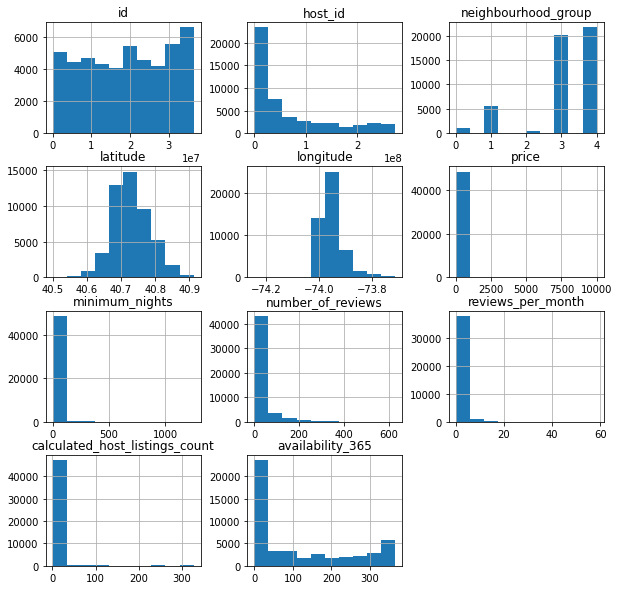

In [212]:
def distribution() : 
  hist = AB.hist(figsize = (10,10)) 
  return hist 
print(distribution())

## Visualizing the mean price and std groupby neighbourhood 

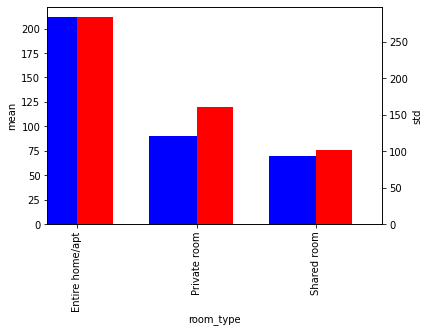

None
The blue column represents for central tendency distribution
The red column represents for the spread of scores


In [213]:
def mean_price() : 
  figure = plt.figure()
  ax = figure.add_subplot()
  ax2 = ax.twinx()
  width = 0.4
  price = AB.groupby('room_type').mean()['price'].plot(kind = 'bar', color = 'blue', ax = ax, position = 1, width = width)
  std = AB.groupby('room_type').std()['price'].plot(kind = 'bar', color = 'red', ax = ax2, position = 0, width = 0.3)
  ax.set_ylabel('mean')
  ax2.set_ylabel('std')
  plt.show() 
print(mean_price())
print("The blue column represents for central tendency distribution")
print("The red column represents for the spread of scores")

## Visualing the mean and standard deviation by group by two columns 

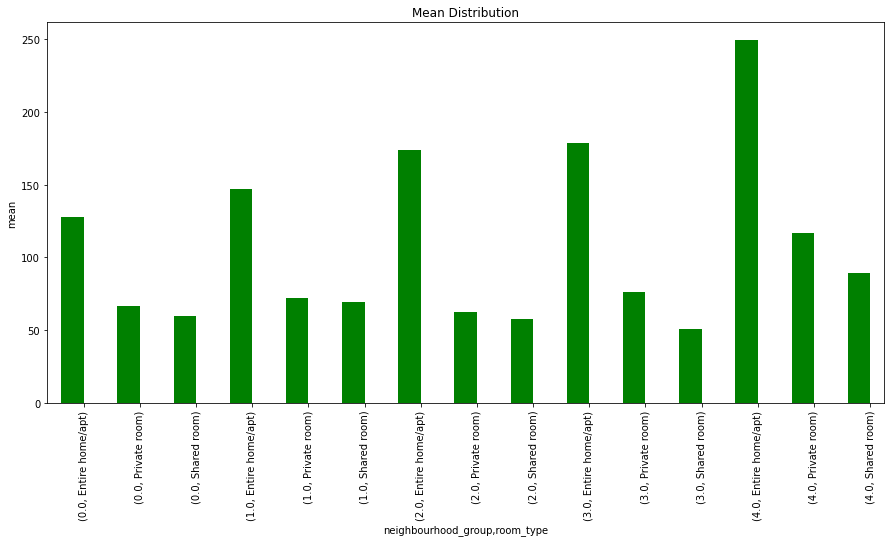

None


In [214]:
def visualization() : 
  figure = plt.figure()
  ax = figure.add_subplot() 
  ax2 = ax.twinx
  width = 0.4
  mean = AB.groupby(['neighbourhood_group','room_type']).mean()['price'].plot(kind = 'bar',position = 1, ax = ax, width = width, figsize = (15,7), color = 'green', title = 'Mean Distribution')
  #std =  AB.groupby(['neighbourhood_group','room_type']).std()['price'].plot(kind = 'bar', position = 0, ax = ax2, width = width) 
  ax.set_ylabel('mean')
  #ax2.set_ylabel('std')
  plt.show()
  
print(visualization())

### Average price by room type 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.087862,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,-0.112981,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
neighbourhood_group,-0.087862,-0.112981,1.000000,0.145657,-0.655834,0.145345,0.060385,-0.048900,-0.120771,0.103820,-0.086381
latitude,-0.003125,0.020224,0.145657,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,-0.655834,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.145345,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.060385,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.048900,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.120771,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.103820,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701


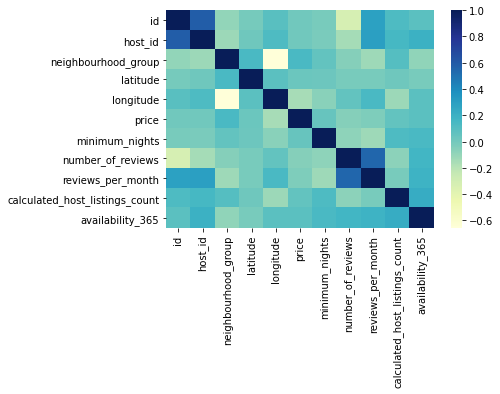

In [215]:
correlation = AB.corr(method = 'pearson')
sns.heatmap(correlation, cmap = 'YlGnBu')
correlation

## Detect outliers 

In [216]:
def availability() : 
  availability = px.box(AB, y = "availability_365", title = "Availability Outliers") 
  availability.show()

print(availability())

None


In [217]:
def price() : 
  price = px.box(AB, y = "price", title = "price") 
  price.show()

print(price())

None


AxesSubplot(0.125,0.125;0.775x0.755)


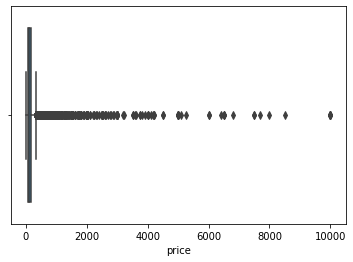

In [218]:
def price_1() : 
  box = sns.boxplot(x = AB['price'])
  return box
print(price_1())

In [219]:
def minimum_nights() : 
  fig = px.box(AB, y = "minimum_nights", title = "Outliers") 
  fig.show() 

print(minimum_nights())

None


In [220]:
def calculated_host_listings () : 
  listings = px.box(AB, y ='calculated_host_listings_count', title = 'Listings Outliers')
  return listings.show()
print(calculated_host_listings())

None


### lets figure our extreme values out with statistical table 

In [221]:
def describe() : 
  des = AB.groupby('neighbourhood_group')[['price']].describe()
  pd.set_option('display.max_columns', None)
  return des 

print(describe())
print("From the statistical table below. It can be clearly seen that there are a lot extreme values in the price and minimum_nights")
print("The ")

                       price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
0.0                   1091.0   87.496792  106.709349   0.0  45.0   65.0   
1.0                   5666.0   99.517649  167.102155  10.0  50.0   75.0   
2.0                    373.0  114.812332  277.620403  13.0  50.0   75.0   
3.0                  20104.0  124.383207  186.873538   0.0  60.0   90.0   
4.0                  21661.0  196.875814  291.383183   0.0  95.0  150.0   

                                     
                       75%      max  
neighbourhood_group                  
0.0                   99.0   2500.0  
1.0                  110.0  10000.0  
2.0                  110.0   5000.0  
3.0                  150.0  10000.0  
4.0                  220.0  10000.0  
From the statistical table below. It can be clearly seen that there are a lot extreme values in

In [222]:
def describe_1() : 
  des_1 = AB[['availability_365']].describe()
  pd.set_option('display.max_columns',None)
  return des_1
print(describe_1())

       availability_365
count      48895.000000
mean         112.781327
std          131.622289
min            0.000000
25%            0.000000
50%           45.000000
75%          227.000000
max          365.000000


In [223]:
def describe_1() : 
  des_1 = AB[['calculated_host_listings_count']].describe()
  pd.set_option('display.max_columns',None)
  return des_1
print(describe_1())

       calculated_host_listings_count
count                    48895.000000
mean                         7.143982
std                         32.952519
min                          1.000000
25%                          1.000000
50%                          1.000000
75%                          2.000000
max                        327.000000


### I would go for conclusion that our data has extreme values. My job is now remove them out of data before doing further analysis

### lets say I would do with give latitude and longitude 

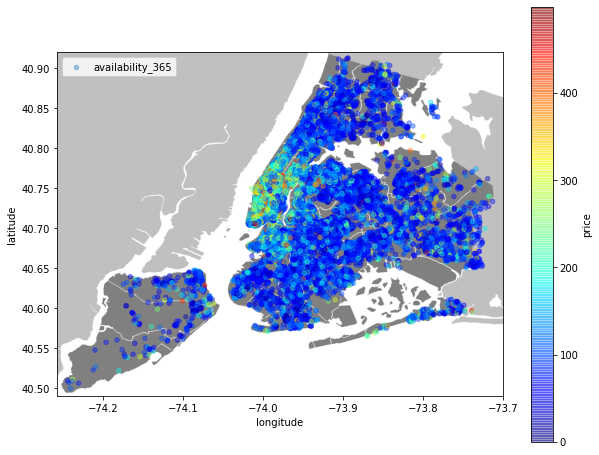

In [224]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
AB[AB.price < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

### Categorical encoding ordinal 

# Building model to dectect outliers before going futher analysis 

### My objective : In this project, I am going to build a neuron network to detect outliers. This is an unspervised learning in machine learning algorithms. Autoencoders is an unspervised learning in machine learning with non-label data 

### Data preprocessing 

### Create a subdataframe 

In [225]:
Sub_dataframe = AB[['price','calculated_host_listings_count','availability_365','minimum_nights']]
Sub_dataframe.sort_values(by = ['price'], ascending = (True))
pd.set_option('display.max_columns',None)
Sub_dataframe.shape

(48895, 4)

In [226]:
X = Sub_dataframe.iloc[:,[0,1,2,3]].values

In [227]:
print(X)

[[149   6 365   1]
 [225   2 355   1]
 [150   1 365   3]
 ...
 [115   1  27  10]
 [ 55   6   2   1]
 [ 90   1  23   7]]


### Using the eblow method to find the optimal number of clusters 

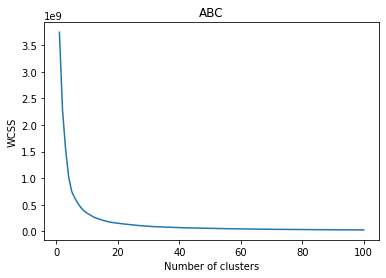

In [228]:
WCSS = []
for i in range(1,101) : 
  kmeans = KMeans(n_clusters = i,init='k-means++' , random_state = 42) 
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1,101),WCSS)
plt.title("ABC")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [229]:
kmeans = KMeans(n_clusters = 10,init='k-means++' , random_state = 42) 
y_kmeans = kmeans.fit_predict(X) 
y_kmeans

array([3, 2, 3, ..., 0, 0, 0], dtype=int32)

In [230]:
print(y_kmeans)
pd.set_option('display.max_rows', None)
data = ({"cluster":y_kmeans})
df = pd.DataFrame(data)
df.to_csv('file.csv')

[3 2 3 ... 0 0 0]


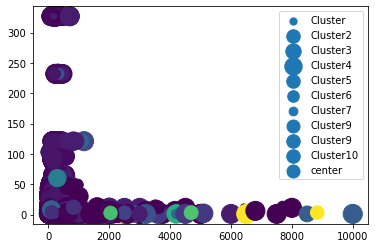

In [231]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2],X[y_kmeans == 0,3], label ='Cluster')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2],X[y_kmeans == 1,3], label ='Cluster2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2],X[y_kmeans == 2,3], label ='Cluster3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],X[y_kmeans == 3,2],X[y_kmeans == 3,3], label ='Cluster4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],X[y_kmeans == 4,2],X[y_kmeans == 4,3], label ='Cluster5')
plt.scatter(X[y_kmeans == 5,0],X[y_kmeans == 5,1],X[y_kmeans == 5,2],X[y_kmeans == 5,3], label ='Cluster6')
plt.scatter(X[y_kmeans == 7,0],X[y_kmeans == 7,1],X[y_kmeans == 7,2],X[y_kmeans == 7,3], label ='Cluster7')
plt.scatter(X[y_kmeans == 8,0],X[y_kmeans == 8,1],X[y_kmeans == 8,2],X[y_kmeans == 8,3], label ='Cluster9')
plt.scatter(X[y_kmeans == 6,0],X[y_kmeans == 6,1],X[y_kmeans == 6,2],X[y_kmeans == 6,3], label ='Cluster9')
plt.scatter(X[y_kmeans == 9,0],X[y_kmeans == 9,1],X[y_kmeans == 9,2],X[y_kmeans == 9,3], label ='Cluster10')
plt.scatter(kmeans.cluster_centers_ [:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],label = 'center')
plt.legend()

In [232]:
X_1 = X[y_kmeans == 0]
X_2 = X[y_kmeans == 1 ]
X_3 = X[y_kmeans == 2]
X_4 = X[y_kmeans == 3 ] 
X_5 = X[y_kmeans == 4 ]
X_6 = X[y_kmeans == 5 ]
X_7 = X[y_kmeans == 6]
X_8 = X[y_kmeans == 7 ]

In [253]:
df_1 = pd.DataFrame(X_1)
df_2 = pd.DataFrame(X_2)
df_3  = pd.DataFrame(X_3)
df_4 = pd.DataFrame(X_4)
df_5 = AB['neighbourhood_group'].iloc[:19121]
df_6 = pd.DataFrame(X_5)
df_7 = pd.DataFrame(X_6)
df_8 = pd.DataFrame(X_7)
df_9 = pd.DataFrame(X_8)

In [322]:
df = pd.concat([df_1,df_2,df_3,df_4,df_6,df_7,df_8,df_9])
df.rename(columns = {0:"price",1:"calculated_host_listings_count",2:"availability_365",3:"minimum_nights",4:"neighbourhood_group"} )
df.shape
df.insert(4,"df_5",df_5)
df.head()
df.shape
df.head()

,0,1,2,3,df_5
0,80,1,0,10,3.0
1,60,1,0,45,4.0
2,79,1,0,2,4.0
3,135,1,6,5,3.0
4,85,1,39,2,4.0


In [283]:
X = df[[1,2,3,"df_5"]]
y = df.iloc[:,0]

In [284]:
X.head()

,1,2,3,df_5
0,1,0,10,3.0
1,1,0,45,4.0
2,1,0,2,4.0
3,1,6,5,3.0
4,1,39,2,4.0


In [285]:
y.head()

0     80
1     60
2     79
3    135
4     85
Name: 0, dtype: int64

## Split into training and testing 

In [286]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 43, shuffle = True) 

In [321]:
X_train.head()

,1,2,3,df_5
249,1,192,5,2.0
3353,1,0,5,4.0
4915,26,249,1,4.0
2368,1,0,1,4.0
3288,96,365,30,4.0


In [323]:
y_train.head()

249     345
3353    104
4915     45
2368    141
3288    165
Name: 0, dtype: int64

In [289]:
y_test.shape

(13708,)

In [290]:
std = StandardScaler() 
std.fit_transform(X_train,y_train)

array([[-0.18710569,  0.64897503, -0.09125965, -1.38757947],
       [-0.18710569, -0.73964312, -0.09125965,  0.8099017 ],
       [ 0.53728086,  1.06122105, -0.2746521 ,  0.8099017 ],
       ...,
       [-0.18710569, -0.50820676, -0.09125965, -0.28883888],
       [-0.12915476,  1.90017785, -0.2746521 , -0.28883888],
       [-0.18710569, -0.61669255,  0.13798091,  0.8099017 ]])

Starting import model and predict the result 

In [291]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)

In [292]:
xgb_r.fit(X_train,y_train)

[14:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             silent=None, subsample=1, verbosity=1)

In [293]:
pred = xgb_r.predict(X_test)
pd.DataFrame(pred).head()

,0
0,90.181076
1,278.294617
2,90.181076
3,97.498123
4,90.181076


In [294]:
rmse = (mean_squared_error(y_test, pred)) 
print((rmse)) 

35347.627587946845


In [295]:
print(math.sqrt(mean_squared_error(y_test, pred)))

188.0096475927415


In [296]:
print(mean_absolute_error(y_test, pred))

74.82511166688614


In [297]:
print("R2 score =", round(sm.r2_score(y_test,pred), 2))

R2 score = -0.02


In [298]:
print("Explain variance score =", round(sm.explained_variance_score(y_test,pred), 2)) 

Explain variance score = 0.04


In [299]:
a = pd.DataFrame({"pred":pred, "test":y_test})
a.to_csv("file_2.csv")

## Decision Tree

In [303]:
decision = DecisionTreeRegressor() 

decision.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [309]:
pred_2 = decision.predict(X_test)
pd.DataFrame(pred_2).head()

,0
0,135.796900
1,360.000000
2,137.664355
3,178.000000
4,133.266355


In [316]:
print(mean_absolute_error(y_test, pred_2))

89.403977014258


In [320]:
print("Explain variance score =", round(sm.explained_variance_score(y_test,pred_2),2))

Explain variance score = -0.86


In [311]:
print("R2 score =", round(sm.r2_score(y_test,pred_2), 2))


R2 score = -0.86


### Randomforest 

In [313]:
Random = RandomForestRegressor() 
Random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [314]:
pred_3 = Random.predict(X_test)

In [315]:
print("R2 score =", round(sm.r2_score(y_test,pred_3), 2))

R2 score = -0.37
